# Heat Maps // Functional Ocean Metagenomes

```
Dustin Michels
10 Nov 2017
```

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
data_path = '../data/'
go_data_path = '../data/go_downloads/'

## Load Metadata DataFrame

In [3]:
# Get and clean project meta data
meta_df = pd.read_csv("../data/project_metadata_functional.csv")
meta_df.columns = meta_df.columns.str.lower()
meta_df.columns = meta_df.columns.str.replace(' ', '_')
meta_df['region'] = meta_df['region'].astype('category')
meta_df['sample_details'] = meta_df['sample_details'].astype('category')
meta_df.drop(
    ['downloaded','link_to_info', 'student'],
    axis=1, inplace=True)

In [4]:
# View first 3 entries
meta_df.head(n=3)

,region,run_id,filename,sample_details,lat/long,depth_(m),temp_(c)_,chlorophyl_(mg_chl/m3),nitrate_(µmol/l),oxygen_(µmol/kg),salinity_(psu)
0,Southern Ocean (near Antarctica),ERR599104,ERR599104_MERGED_FASTQ_GO.csv,deep chlorophyll maximum layer,"-62.2231 , -49.2139",90,-0.78154,0.540091,33.109231,325.402987,34.319478
1,Southern Ocean (near Antarctica),ERR599090,ERR599090_MERGED_FASTQ_GO.csv,surface water layer,"-62.0385 , -49.5290",5,0.67108,0.065273,27.501159,343.437300,34.353880
2,Southern Ocean (near Antarctica),ERR599008,ERR599008_MERGED_FASTQ_GO.csv,mesopelagic zone,"-61.9689 , -49.5017",790,0.45883,0.010087,38.821249,203.839400,34.679960


## Load GO data for Each Sample; Merge Together

In [5]:
# Helper function for getting GO annotations into DataFrames

def get_df(idx):
    """Make df given index for meta_df"""
    
    filenames = meta_df['filename']
    names = ['id', 'name', 'namespace', 'read_count']
    df = pd.read_csv(
        f"{go_data_path}{filenames[idx]}", header=None,
        names=names)
    df.insert(0, 'run_id', meta_df['run_id'][idx])
    df.insert(1, 'region', meta_df['region'][idx])
    df.insert(2, 'zone', meta_df['sample_details'][idx])

    df = df.iloc[:8, :]
    return df

In [6]:
# Get GO annotation df for each sample, merge them together

df = get_df(0)
for i in range(1, len(meta_df)):
    new_df = get_df(i)
    df = pd.concat([df, new_df])

In [7]:
# View head and tail of DataFrame
display(df.head())
display(df.tail())

,run_id,region,zone,id,name,namespace,read_count
0,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,GO:0055114,oxidation-reduction process,biological_process,895806
1,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,GO:0008152,metabolic process,biological_process,612785
2,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,GO:0006810,transport,biological_process,232694
3,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,GO:0009058,biosynthetic process,biological_process,190437
4,ERR599104,Southern Ocean (near Antarctica),deep chlorophyll maximum layer,GO:0006412,translation,biological_process,162214


,run_id,region,zone,id,name,namespace,read_count
3,ERR599031,Arabian Sea,mesopelagic zone,GO:0009058,biosynthetic process,biological_process,188791
4,ERR599031,Arabian Sea,mesopelagic zone,GO:0005975,carbohydrate metabolic process,biological_process,145550
5,ERR599031,Arabian Sea,mesopelagic zone,GO:0006412,translation,biological_process,144020
6,ERR599031,Arabian Sea,mesopelagic zone,GO:0006418,tRNA aminoacylation for protein translation,biological_process,139630
7,ERR599031,Arabian Sea,mesopelagic zone,GO:0006508,proteolysis,biological_process,132579


## Make Plots

### All Samples

In [8]:
# rearrange relevent data
data = df.pivot(index='name', columns='run_id', values='read_count')

In [9]:
display(data)

run_id,ERR598948,ERR598980,ERR598992,ERR598995,ERR598999,ERR599008,ERR599031,ERR599078,ERR599090,ERR599104,ERR599142
name,,,,,,,,,,,
biosynthetic process,1051532,1115327,1052142,1364620,318013,721296,188791,1169525,1140419,190437,1311550
carbohydrate metabolic process,808624,856229,791904,1076485,248879,588174,145550,916441,785616,135825,1009441
metabolic process,3306288,4232762,3184073,3884329,1157379,2928018,652929,3836620,3587301,612785,3707114
oxidation-reduction process,4986101,6138206,4732448,6048511,1646452,3999656,943974,5705414,5448192,895806,5540483
proteolysis,723304,751977,715077,912046,211085,515894,132579,787280,680714,120004,822063
tRNA aminoacylation for protein translation,807826,872329,815095,981599,243793,536316,139630,935708,837289,139294,964689
translation,879141,933259,922807,1069342,272339,578697,144020,1074002,975687,162214,1064101
transport,1285849,1359241,1156028,1324107,390897,936136,205704,1409368,1413506,232694,1285259


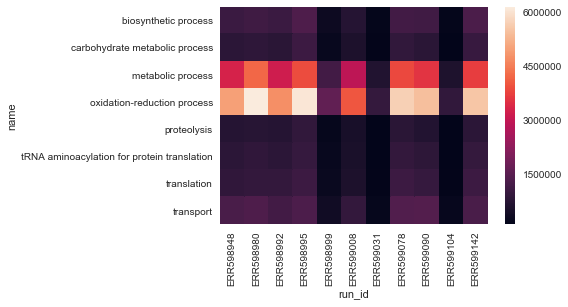

In [10]:
# Make plot
fig, ax = plt.subplots()
sns.heatmap(ax=ax, data=data)
fig.savefig('heat_all_samples.png', bbox_inches='tight', dpi=300)

### By Region

In [11]:
# Rearrange data; summing regions together
data = df.pivot_table(index='name', columns='region', aggfunc={'read_count':sum})
display(data)

read_count  \
region                                      Arabian Sea   
name                                                      
biosynthetic process                             188791   
carbohydrate metabolic process                   145550   
metabolic process                                652929   
oxidation-reduction process                      943974   
proteolysis                                      132579   
tRNA aminoacylation for protein translation      139630   
translation                                      144020   
transport                                        205704   

                                                                                        \
region                                      North Atlantic (off the coast of Portugal)   
name                                                                                     
biosynthetic process                                                           1169525   
carbohydrate metabolic process                                                  916441   
metabolic process                                                              3836620   
oxidation-reduction process                                                    5705414   
proteolysis                                                                     787280   
tRNA aminoacylation for protein translation                                     935708   
translation                                                                    1074002   
transport                                                                      1409368   

                                                           \
region                                      North Pacific   
name                                                        
biosynthetic process                              3791497   
carbohydrate metabolic process                    2942155   
metabolic process                                11824205   
oxidation-reduction process                      17727200   
proteolysis                                       2486086   
tRNA aminoacylation for protein translation       2818617   
translation                                       3066702   
transport                                         3968607   

                                                                                \
region                                      South Pacific (near the Marquesas)   
name                                                                             
biosynthetic process                                                   2421687   
carbohydrate metabolic process                                         1849407   
metabolic process                                                      7647740   
oxidation-reduction process                                           11365001   
proteolysis                                                            1649466   
tRNA aminoacylation for protein translation                            1866714   
translation                                                            2074287   
transport                                                              2832774   

                                                                              
region                                      Southern Ocean (near Antarctica)  
name                                                                          
biosynthetic process                                                 2052152  
carbohydrate metabolic process                                       1509615  
metabolic process                                                    7128104  
oxidation-reduction process                                         10343654  
proteolysis                                                          1316612  
tRNA aminoacylation for protein translation                          1512899  
translation                                                          1716598  
transport                              

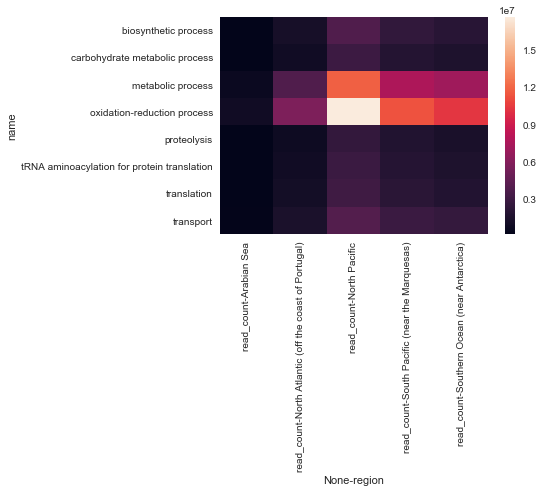

In [12]:
# Make plot
fig, ax = plt.subplots()
sns.heatmap(ax=ax, data=data)
fig.savefig('heat_by_region.png', bbox_inches='tight', dpi=300)

### By Zone

In [13]:
# Rearrange data; summing zones together
data = df.pivot_table(index='name', columns='zone', aggfunc={'read_count':sum})
display(data)

read_count  \
zone                                        deep chlorophyll maximum layer   
name                                                                         
biosynthetic process                                               2606589   
carbohydrate metabolic process                                     2020934   
metabolic process                                                  7803402   
oxidation-reduction process                                       11930418   
proteolysis                                                        1755354   
tRNA aminoacylation for protein translation                        1928719   
translation                                                        2110697   
transport                                                          2842650   

                                                              \
zone                                        mesopelagic zone   
name                                                           
biosynthetic process                                 1622131   
carbohydrate metabolic process                       1250658   
metabolic process                                    6043070   
oxidation-reduction process                          8728632   
proteolysis                                          1095641   
tRNA aminoacylation for protein translation          1255752   
translation                                          1349618   
transport                                            1955842   

                                                               \
zone                                        mesopelagic zone    
name                                                            
biosynthetic process                                   721296   
carbohydrate metabolic process                         588174   
metabolic process                                     2928018   
oxidation-reduction process                           3999656   
proteolysis                                            515894   
tRNA aminoacylation for protein translation            536316   
translation                                            578697   
transport                                              936136   

                                                                 \
zone                                        surface water layer   
name                                                              
biosynthetic process                                    3362086   
carbohydrate metabolic process                          2493961   
metabolic process                                      10607994   
oxidation-reduction process                            15886054   
proteolysis                                             2183071   
tRNA aminoacylation for protein translation             2588092   
translation                                             2972496   
transport                                               3978902   

                                                                  
zone                                        surface water layer   
name                                                              
biosynthetic process                                     1311550  
carbohydrate metabolic process                           1009441  
metabolic process                                        3707114  
oxidation-reduction process                              5540483  
proteolysis                                               822063  
tRNA aminoacylation for protein translation               964689  
translation                                              1064101  
transport                                                1285259

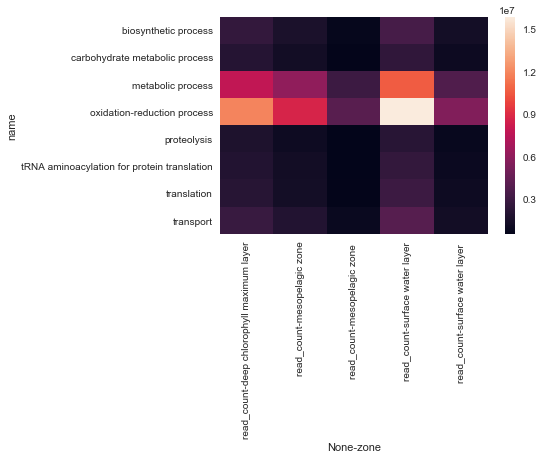

In [14]:
# Make plot
fig, ax = plt.subplots()
sns.heatmap(ax=ax, data=data)
fig.savefig('heat_by_zone.png', bbox_inches='tight', dpi=300)